### Classification Project: Mushroom Classification

The goal is to classify whether the mushroom is Edible or Poisonuous.
#### Group members
- Saifali
- Tushar
- Amol 
- Tejaswini

### Importing All The Libraries Necessary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder as Labelencoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV
import warnings
warnings.filterwarnings("ignore")

### EDA

In [2]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

##### Dataset Information
- 8124 rows x 23 columns with no any null values. 
- We have 22 features and 1 class.

#### Let's Check if the Data is Balanced or Imbalanced as we have only binary class.

In [5]:
edible_cnt = df[df["class"] == "e"]["class"].count()
poisonus_cnt = df[df["class"] == "p"]["class"].count() 

In [6]:
ratio = poisonus_cnt/float(edible_cnt)
print("Posionuous to Edibl Ratio: {} \nPoisonous Count: {} \nEdible Count: {}" .format(ratio.round(2),poisonus_cnt,edible_cnt))

Posionuous to Edibl Ratio: 0.93 
Poisonous Count: 3916 
Edible Count: 4208


#### Let's Check For Unique Values in Every Feature.

In [7]:
columns = df.columns.values
for column in columns:
    print("{0}: {1}".format(column, df[column].unique()))

class: ['p' 'e']
cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
cap-surface: ['s' 'y' 'f' 'g']
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises: ['t' 'f']
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment: ['f' 'a']
gill-spacing: ['c' 'w']
gill-size: ['n' 'b']
gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape: ['e' 't']
stalk-root: ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring: ['s' 'f' 'k' 'y']
stalk-surface-below-ring: ['s' 'f' 'y' 'k']
stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type: ['p']
veil-color: ['w' 'n' 'o' 'y']
ring-number: ['o' 't' 'n']
ring-type: ['p' 'e' 'l' 'f' 'n']
spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population: ['s' 'n' 'a' 'v' 'y' 'c']
habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']


##### Data Information
- 'veil-type' has only one unique value 'p', which means it doesn't relate to the classification result and can be dropped.
- 'stalk-root' has '?' values. Lets check exactly how many ? values are there.

In [8]:
print("\n There are {} '?' values in the feature 'stalk-root'".format(df[df["stalk-root"] == "?"]["stalk-root"].count()))


 There are 2480 '?' values in the feature 'stalk-root'


 As we can see, almost 30% of the data.

In [9]:
df = df.drop("veil-type", axis = 1)
df.shape

(8124, 22)

### Data Visualiation

Text(0.5, 1.0, 'Class')

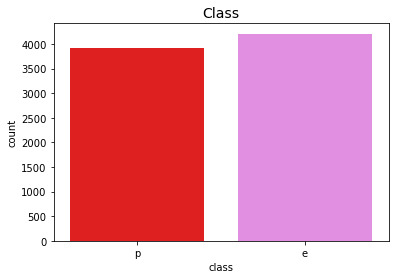

In [10]:
sns.countplot(x = df["class"], data = df, palette=('red','violet'))
plt.title("Class",fontsize=14)

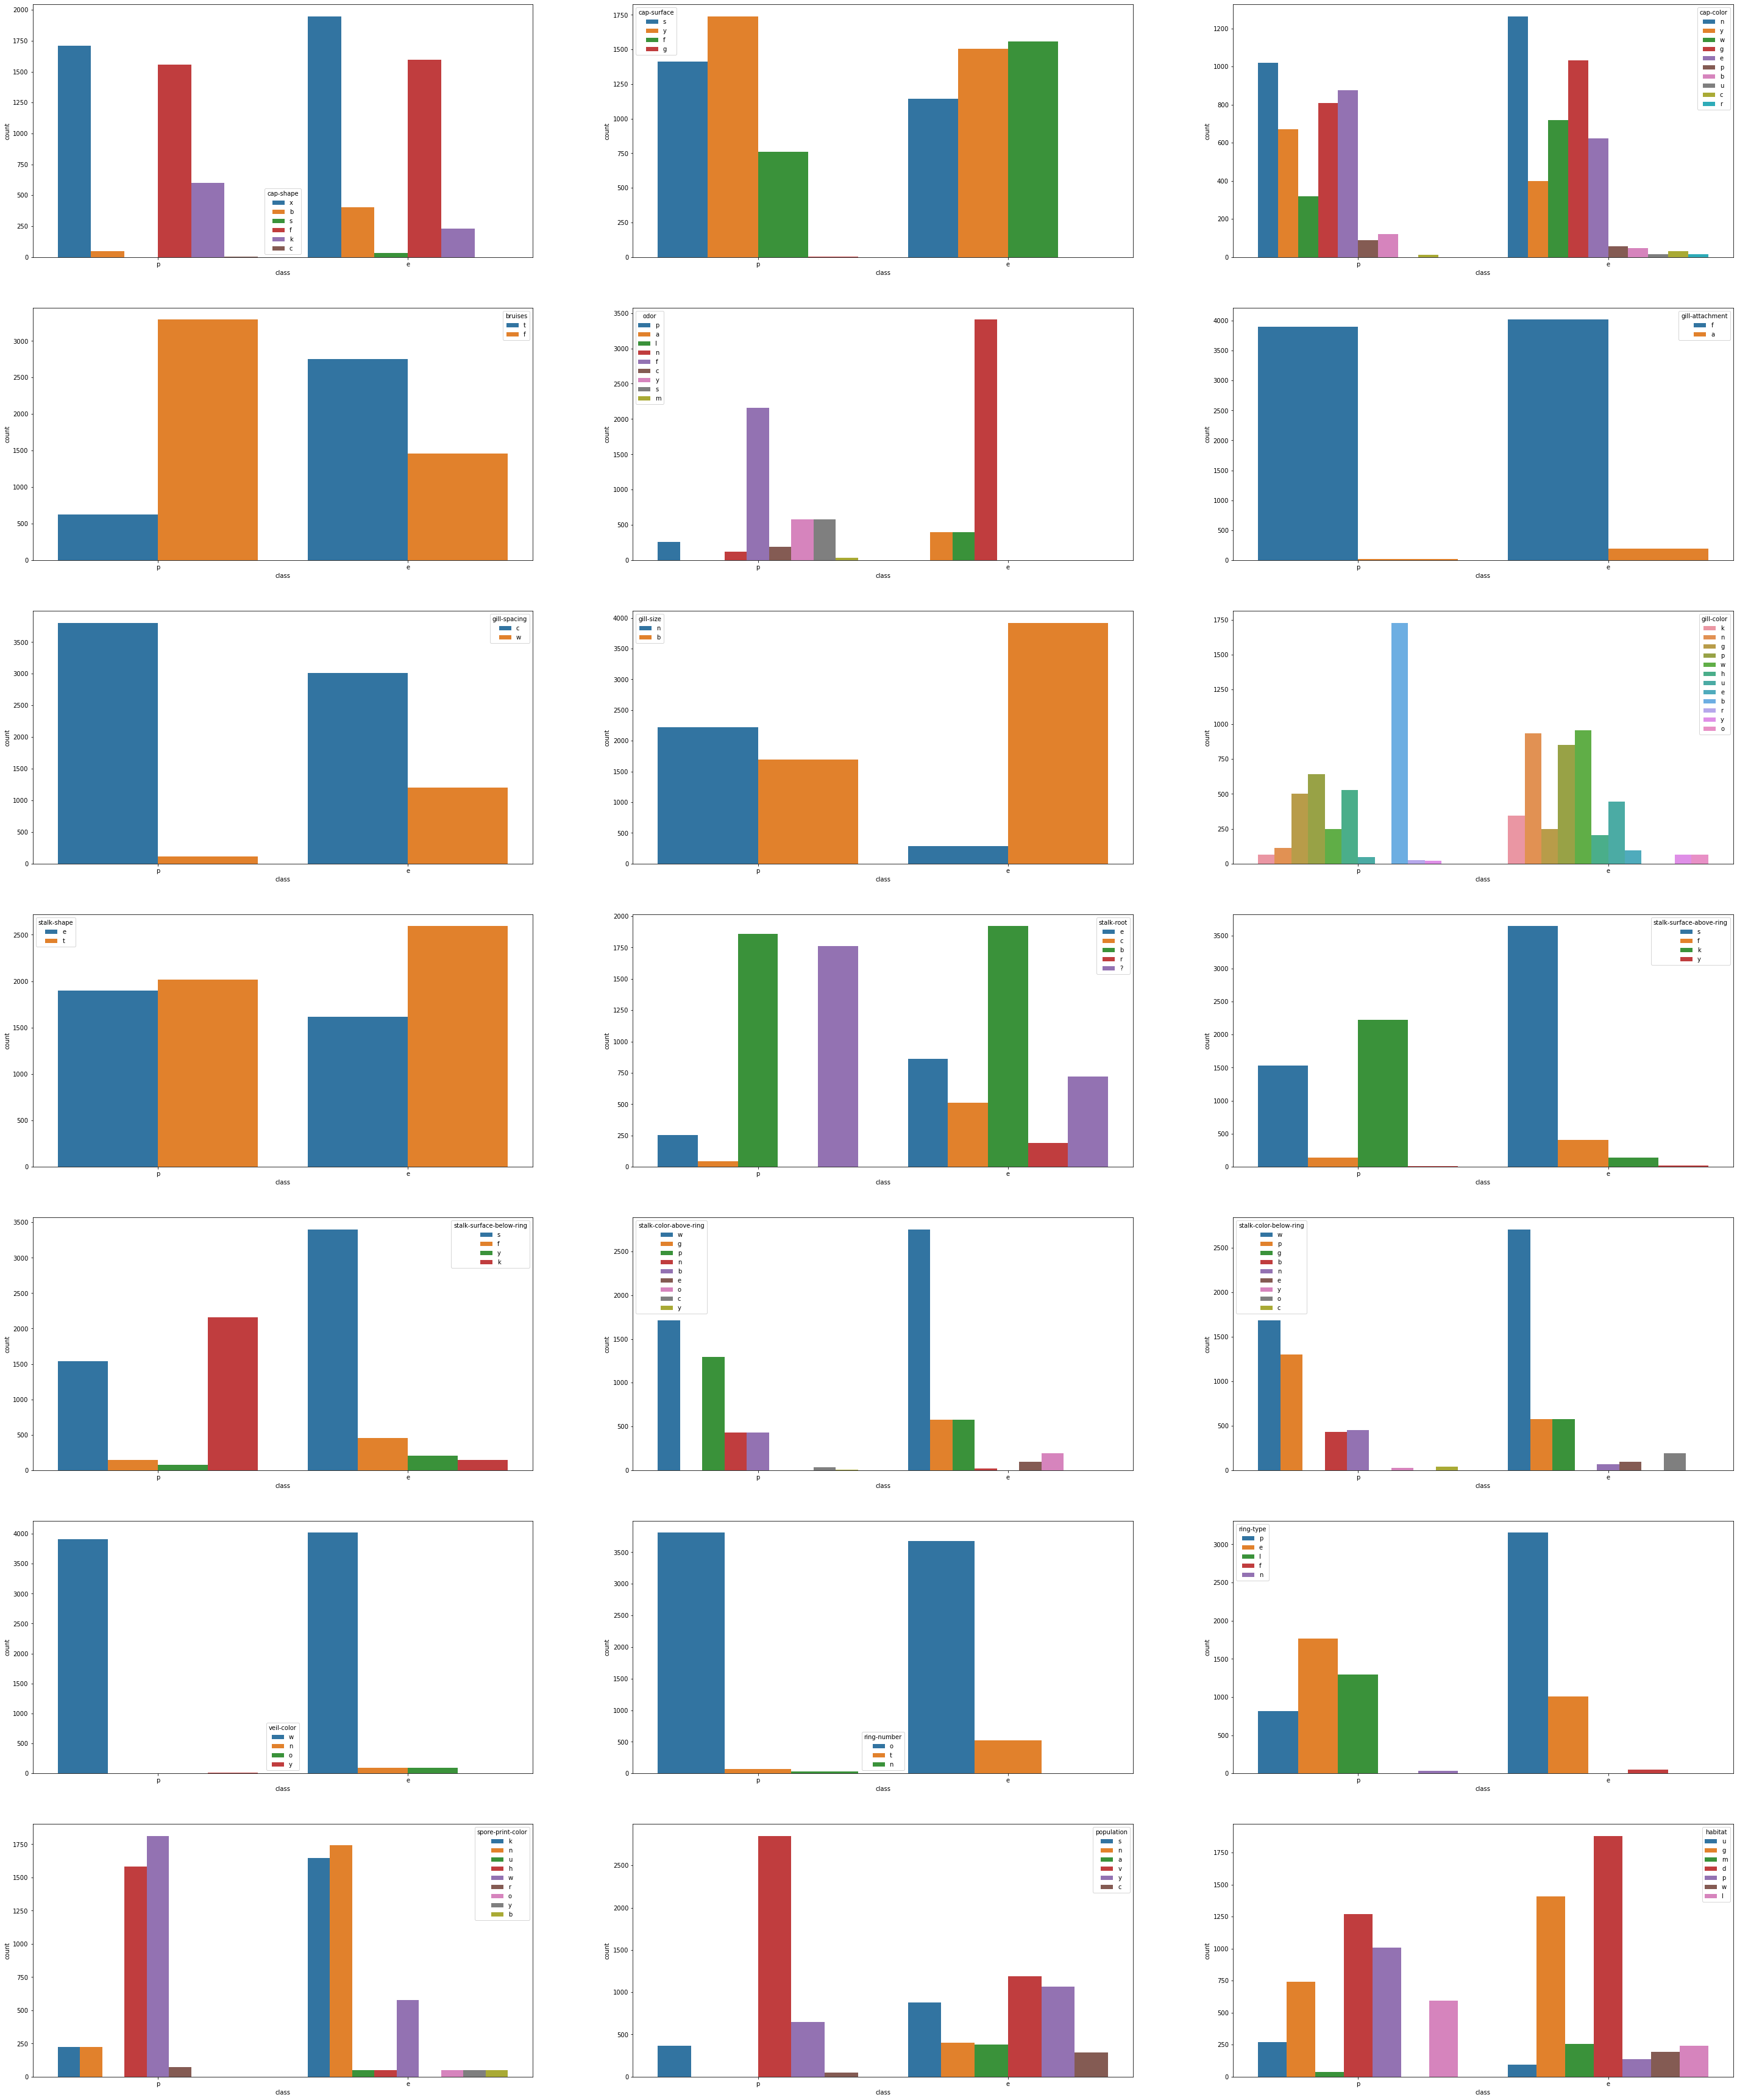

In [11]:
i = 1
plt.figure(figsize=(50,90))
for col in df.columns:
    if col != "class" :
        plt.subplot(10,3,i)
        i += 1
        sns.countplot(x="class", hue=col, data=df)

In [12]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

#### Cap Shape

Text(0, 0.5, 'Count')

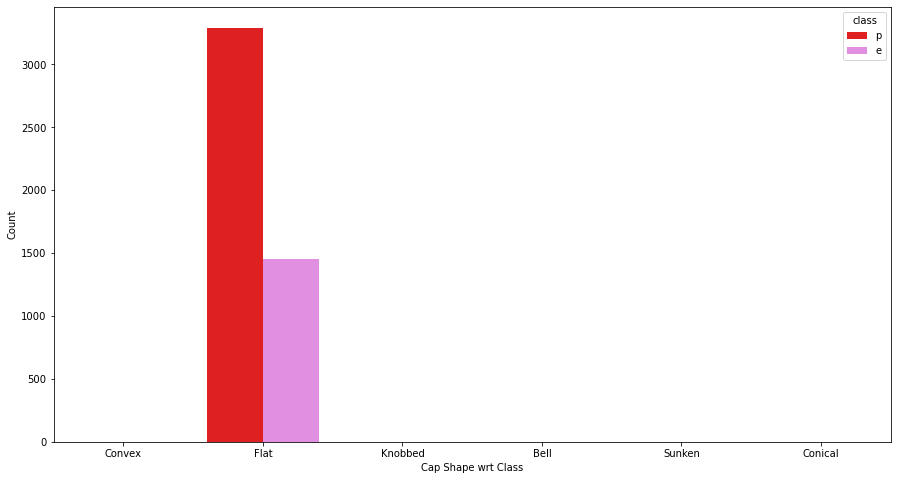

In [13]:
ax = plt.figure(figsize =(15,8))
ax = sns.countplot(x="bruises", data=df, hue="class",order=df['cap-shape'].value_counts().index,palette=('red','violet'))
ax.set_xticklabels(["Convex","Flat","Knobbed","Bell","Sunken","Conical"])
ax.set_xlabel("Cap Shape wrt Class")
ax.set_ylabel("Count") 

#### Odor

Text(0, 0.5, 'Count')

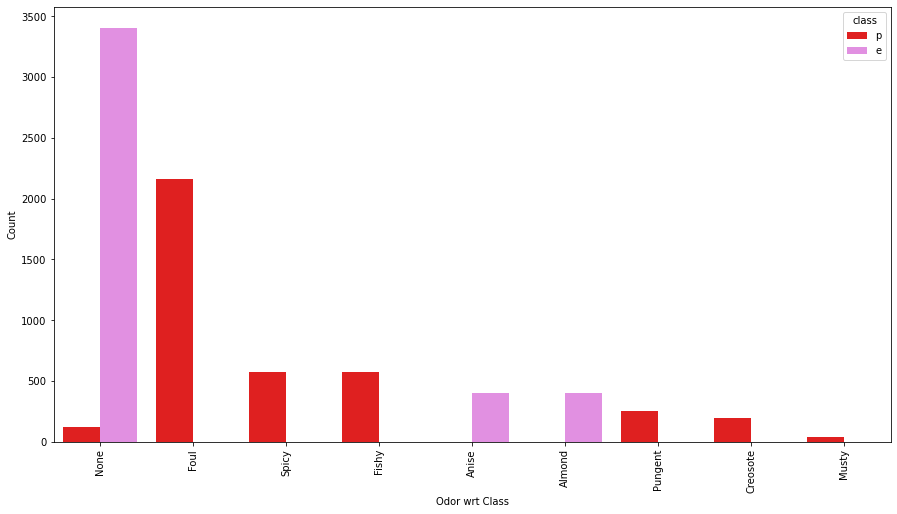

In [14]:
ax = plt.figure(figsize =(15,8))
ax = sns.countplot(x="odor", data=df, hue="class", order=df["odor"].value_counts().index, palette=('red','violet'))
ax.set_xticklabels(["None","Foul","Spicy","Fishy","Anise","Almond","Pungent","Creosote","Musty"],rotation='vertical')
ax.set_xlabel("Odor wrt Class")
ax.set_ylabel("Count") 

#### Ring Numbers

Text(0, 0.5, 'Count')

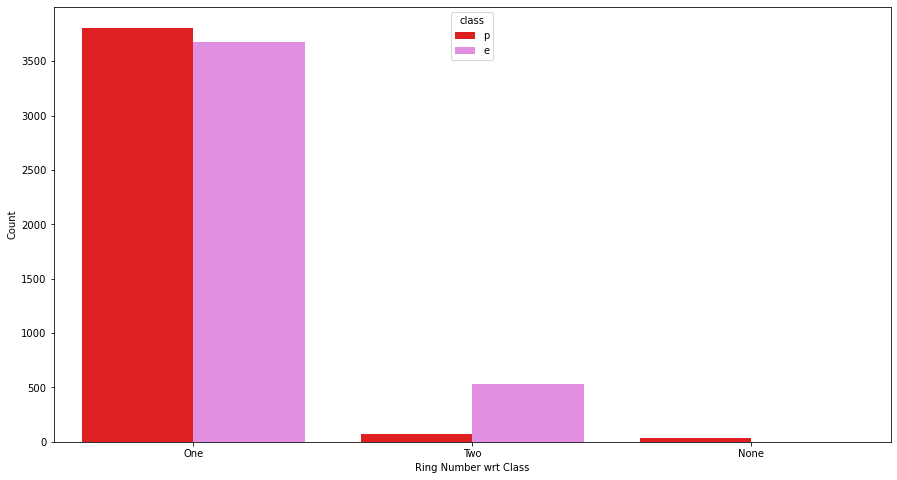

In [15]:
ax = plt.figure(figsize =(15,8))
ax = sns.countplot(x="ring-number", data=df, hue="class", order=df["ring-number"].value_counts().index, palette=('red','violet'))
ax.set_xticklabels(["One","Two","None"])
ax.set_xlabel("Ring Number wrt Class")
ax.set_ylabel("Count") 

#### Ring Type

Text(0, 0.5, 'Count')

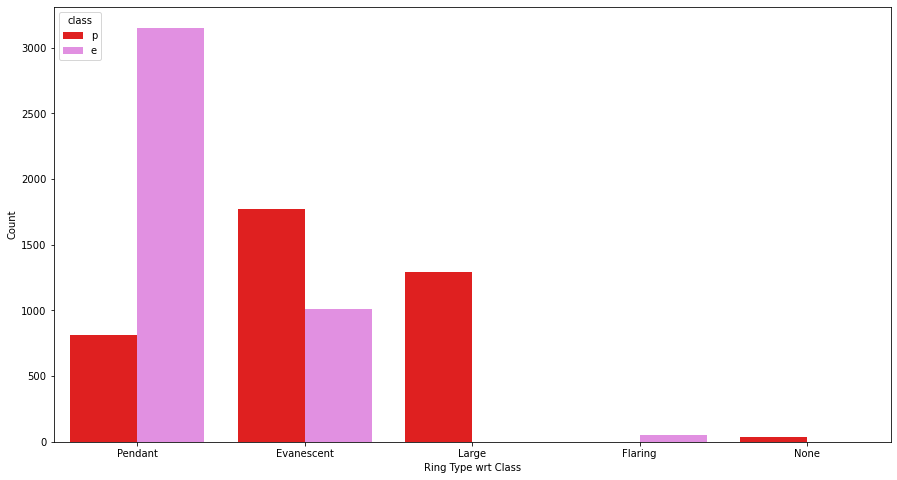

In [16]:
ax = plt.figure(figsize =(15,8))
ax = sns.countplot(x="ring-type", data=df, hue="class", order=df["ring-type"].value_counts().index, palette=('red','violet'))
ax.set_xticklabels(["Pendant","Evanescent","Large","Flaring","None"])
ax.set_xlabel("Ring Type wrt Class")
ax.set_ylabel("Count") 

#### Information Derived
- A Mushrooms with cap shape of flat appear to be more poisonuous than other cap shapes.
- A Mushrooms with bruises are more edible than the no bruises mushroom
- A mushroom with no odor is likely to be edible whereas a mushroom with fihsy odor is likely to be poisonous
- A mushroom with large rings is likely to be poisonous whereas a mushroom with pendant ring is likely to be edible
- A mushroom with population of type several is likely to be poisonous
- A mushroom with habitat as path is likely to be posionous
- A mushroom with spore print color of chocolate or white is likely to be poisonouse whereas of color black or brown is likely to be edible

This a traditional way we visualize the data. I cam accross a Library called ***Sweetviz*** which helps tremendously in creating visualization of the data.

In [17]:
import sweetviz

In [18]:
le = Labelencoder()
df['class'] = le.fit_transform(df['class'])

In [19]:
my_report = sweetviz.analyze([df,"Data"],target_feat = "class")

                                             |                                             | [  0%]   00:00 ->…

In [20]:
my_report.show_html("Visualization.html")

Report Visualization.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Data Preprocessing

In [21]:
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [22]:
#Replacing missing values with bulbous stalk root
df['stalk-root'].replace("?", "u", inplace = True)

In [23]:
df['stalk-root'].value_counts()

b    3776
u    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

#### Label Encoding

In [24]:
encoded_vals = list()
for column in range(len(df.columns)):
    df[df.columns[column]] = le.fit_transform(df[df.columns[column]])
    encoded_vals_dict = {index: label for index, label in enumerate(le.classes_)}
    encoded_vals.append(encoded_vals_dict)

In [25]:
encoded_vals

[{0: 0, 1: 1},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'r', 4: 'u'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y'},
 {0: 'd', 1

In [26]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [27]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2
8123,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,4,1,2


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

### Modelling

In [29]:
x = df.drop(columns = ['class'])
y = df['class']
x.shape,y.shape

((8124, 21), (8124,))

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [31]:
names = []
accuracy = []
auc = []
time = []
def Model(model,name):
    before = datetime.datetime.now()
    model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    after = datetime.datetime.now()
    total_time = after - before
    time.append(total_time.microseconds/(1e+6))
    names.append(name)
    acc  = accuracy_score(ytest,pred)
    # print(f'Accuracy: {acc}')
    print(f'----------------------------------{name} Summary ---------------------------------\n {classification_report(ytest,pred)}')
    accuracy.append(acc)
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'{name} Plots')
    #probability of positive class
    pred_prob=model.predict_proba(xtest)[:,1]
    fpr,tpr,_=roc_curve(ytest,pred_prob)
    auc1=roc_auc_score(ytest,pred_prob)
    auc.append(auc1)
    sns.heatmap(confusion_matrix(ytest,pred),annot = True,ax = axes[0])
    axes[0].set_title('Confusion Matrix')
    sns.lineplot(fpr,tpr,ax = axes[1])
    plt.plot(fpr,tpr,label="ROC curve")
    plt.title('ROC Curve')
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend() 
    return pd.DataFrame({'Model':names,'Accuracy':accuracy,'AUC':auc,'Total Time Taken By Model(in s)':time})

In [32]:
models={"LogisticRegression":LogisticRegression(),"DecisionTreeClassifier":DecisionTreeClassifier(),"SVM":SVC(probability=True)
        ,"KNN":KNeighborsClassifier(),"GNB":GaussianNB(),"RandomForestClassifier":RandomForestClassifier(),
       "AdaBoostClassifier":AdaBoostClassifier(),"GradientBoostingClassifier":GradientBoostingClassifier(),
       "XGBClassifier":XGBClassifier()}

In [33]:
def ResultOfAllModels(models):
    for name, model in models.items():
        result = Model(model,name)
    return result

----------------------------------LogisticRegression Summary ---------------------------------
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       843
           1       0.96      0.94      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

----------------------------------DecisionTreeClassifier Summary ---------------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

----------------------------------SVM Summary ---------------------------------
               precision    recall  f1-score   support

           0  

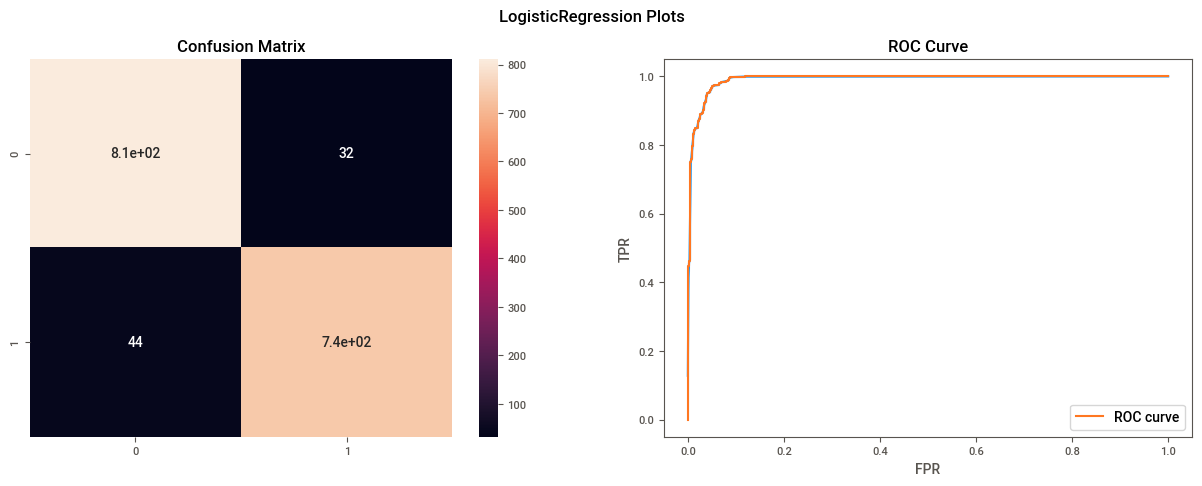

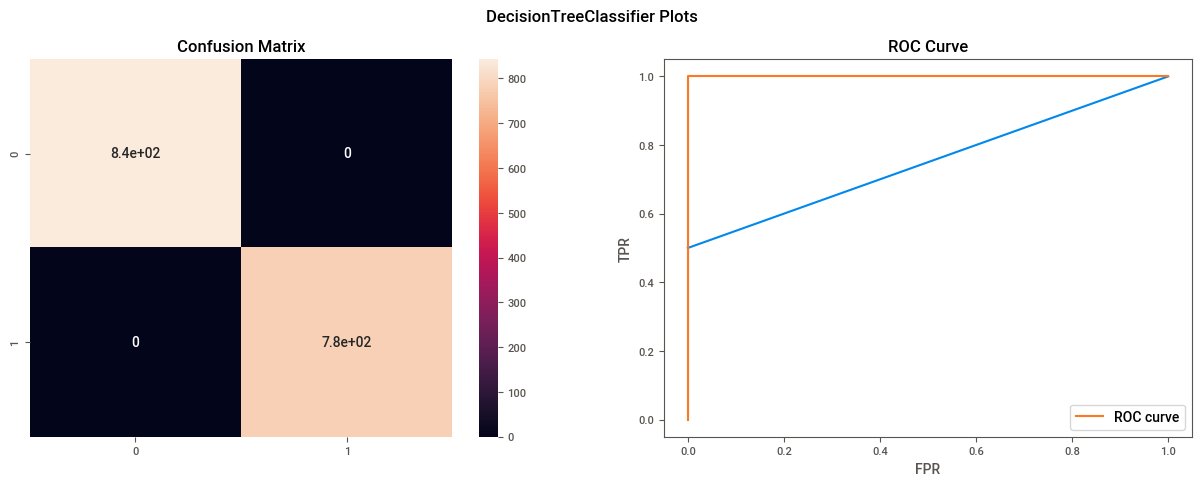

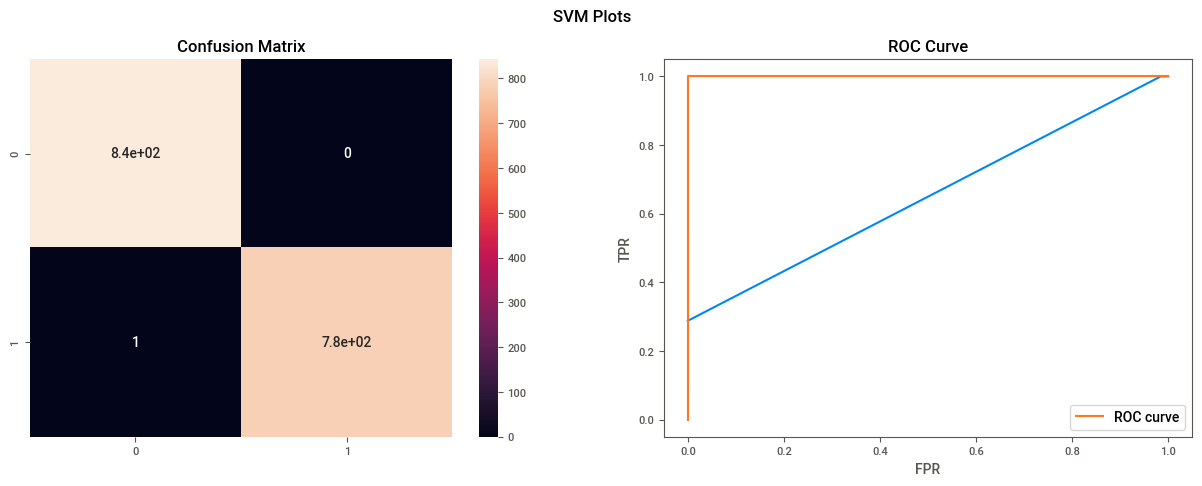

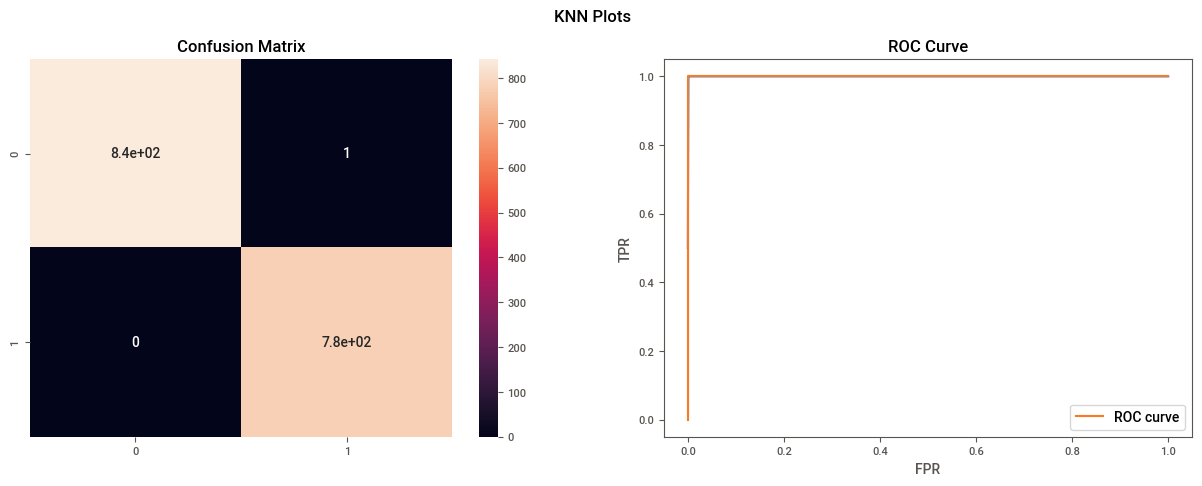

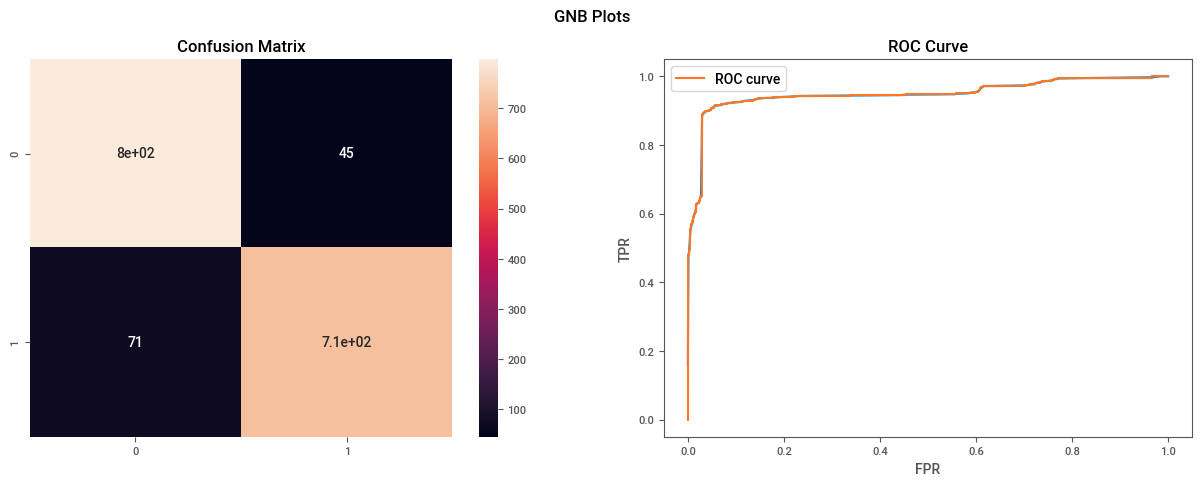

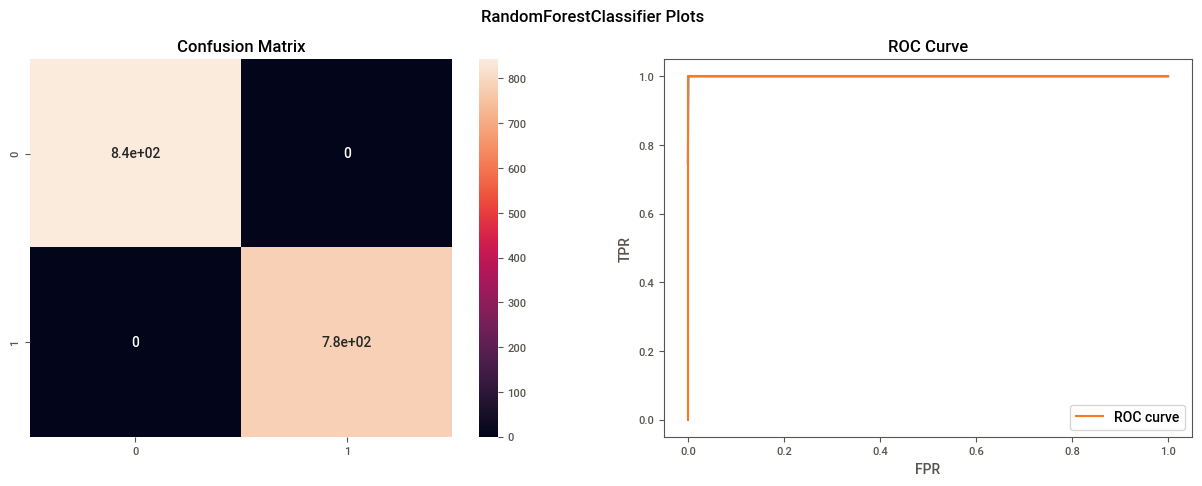

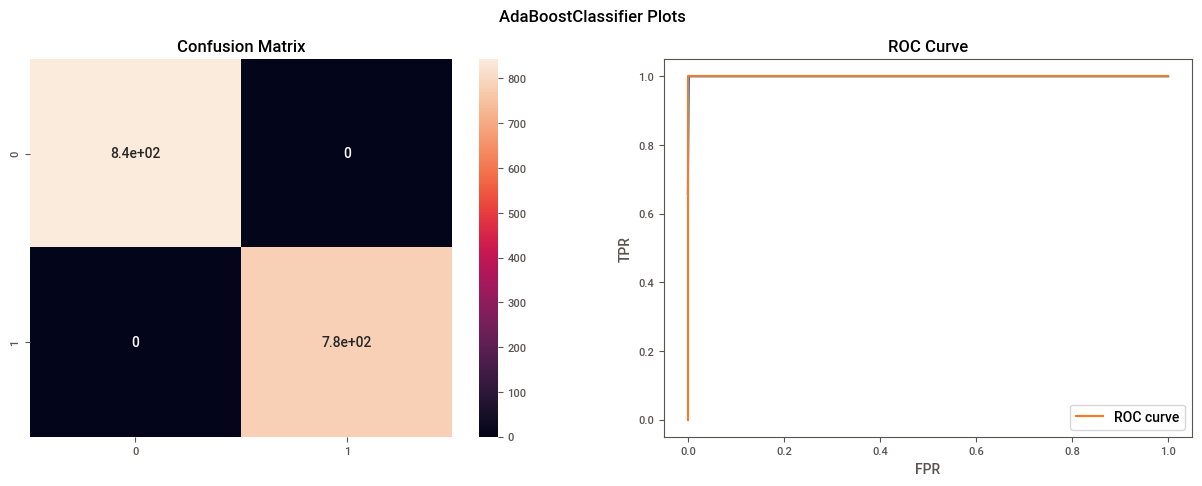

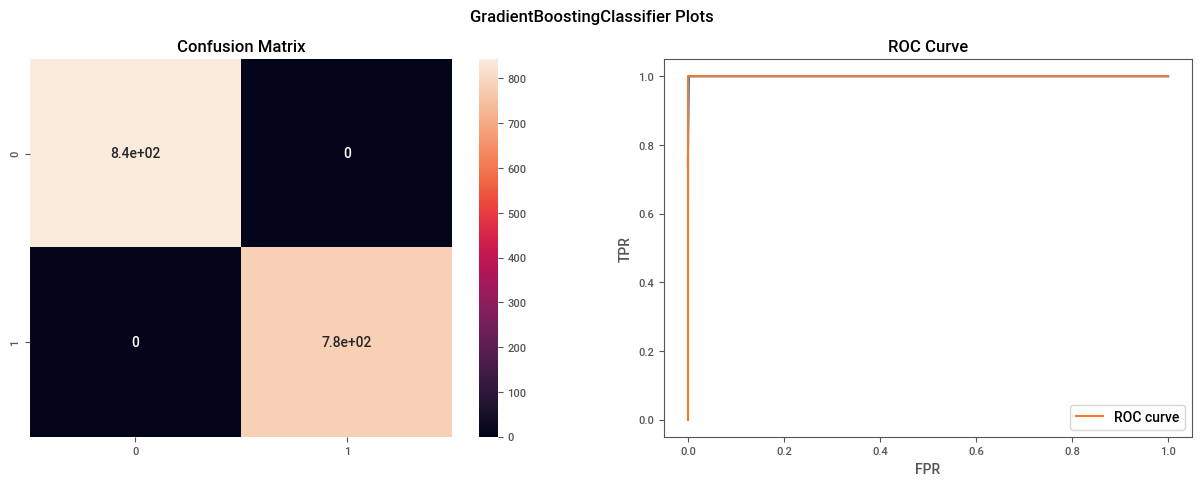

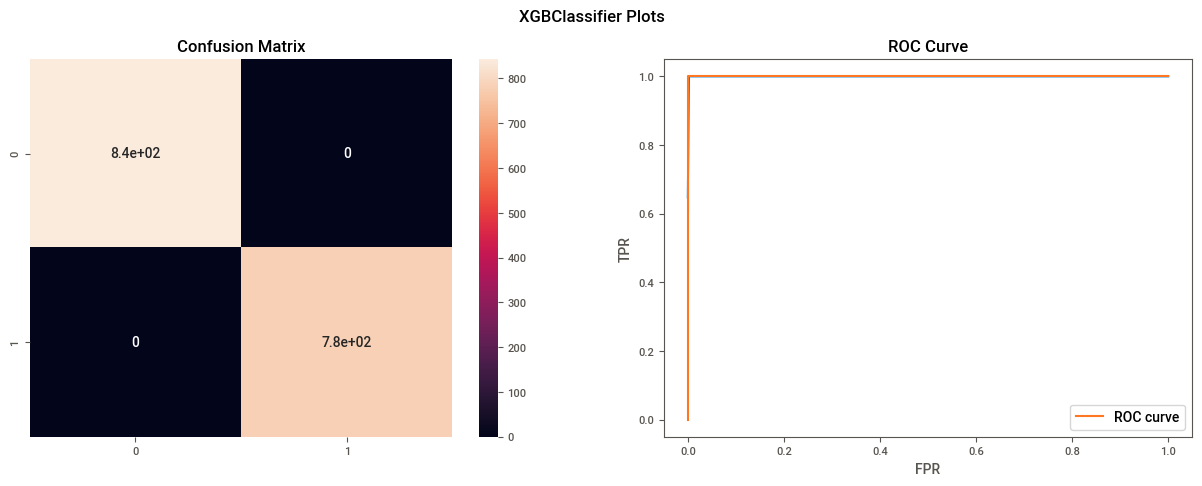

In [34]:
result = ResultOfAllModels(models)

In [35]:
def model_acc_time(result):
    result = result[result.Accuracy >= 0.9 ]
    return result[result['Total Time Taken By Model(in s)'] == result['Total Time Taken By Model(in s)']]

In [36]:
model_acc_time(result)

,Model,Accuracy,AUC,Total Time Taken By Model(in s)
0,LogisticRegression,0.953231,0.991343,0.440345
1,DecisionTreeClassifier,1.000000,1.000000,0.015622
2,SVM,0.999385,1.000000,0.432850
3,KNN,0.999385,1.000000,0.296732
4,GNB,0.928615,0.948694,0.015662
5,RandomForestClassifier,1.000000,1.000000,0.381455
6,AdaBoostClassifier,1.000000,1.000000,0.299531
7,GradientBoostingClassifier,1.000000,1.000000,0.678701
8,XGBClassifier,1.000000,1.000000,0.328657


In [37]:
def Best_Model(result):
    result = result[result.Accuracy == 1.0 ]
    return result[result['Total Time Taken By Model(in s)'] == result['Total Time Taken By Model(in s)'].min()]


In [38]:
Best_Model(result)

,Model,Accuracy,AUC,Total Time Taken By Model(in s)
1,DecisionTreeClassifier,1.0,1.0,0.015622


### Conclusion


- With confusion matrix we saw that our train and test datas - balanced, so there is no problem in there.
- Most of classfication methods hit 100% accuracy with this dataset.
- This system  gives us the model of high **Accuracy** with **Minimum Time** took to build the model.